<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Подготовка" data-toc-modified-id="1.-Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Подготовка</a></span><ul class="toc-item"><li><span><a href="#1.1.-BERT" data-toc-modified-id="1.1.-BERT-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1. BERT</a></span></li><li><span><a href="#1.2.-TF-IDF" data-toc-modified-id="1.2.-TF-IDF-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2. TF-IDF</a></span></li><li><span><a href="#1.3.-Изменение-баланса-классов" data-toc-modified-id="1.3.-Изменение-баланса-классов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3. Изменение баланса классов</a></span><ul class="toc-item"><li><span><a href="#1.3.1.-Изменение-весов" data-toc-modified-id="1.3.1.-Изменение-весов-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>1.3.1. Изменение весов</a></span></li><li><span><a href="#1.3.2.-Ресемплирование-с-уменьшением-класса-0" data-toc-modified-id="1.3.2.-Ресемплирование-с-уменьшением-класса-0-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>1.3.2. Ресемплирование с уменьшением класса 0</a></span></li></ul></li></ul></li><li><span><a href="#2.-Обучение" data-toc-modified-id="2.-Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Обучение</a></span><ul class="toc-item"><li><span><a href="#2.1.-Логистическая-регрессия" data-toc-modified-id="2.1.-Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1. Логистическая регрессия</a></span></li><li><span><a href="#2.2.-LGBM" data-toc-modified-id="2.2.-LGBM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2. LGBM</a></span></li><li><span><a href="#2.3.-CatBoost" data-toc-modified-id="2.3.-CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3. CatBoost</a></span></li><li><span><a href="#2.4.-LogisticRegression-with-BERT" data-toc-modified-id="2.4.-LogisticRegression-with-BERT-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4. LogisticRegression with BERT</a></span></li></ul></li><li><span><a href="#3.-Выводы" data-toc-modified-id="3.-Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Выводы</a></span></li><li><span><a href="#4.-Чек-лист-проверки" data-toc-modified-id="4.-Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» с BERT, запущенным на CUDA

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Примечание студента:** поскольку BERT работает долго, а у меня видеокарта RTX 3080, я решила также изучить запуск обучения с использованием её вычислительных ресурсов, используя CUDA-версию библиотеки PyTorch.

## 1. Подготовка

In [1]:
# установка CUDA-версии PyTorch
!pip3 install torch --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.15.2%2Bcu118-cp39-cp39-linux_x86_64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.0.2%2Bcu118-cp39-cp39-linux_x86_64.whl (4.4 MB)
     |████████████████████████████████| 2267.3 MB 1.4 MB/s eta 0:00:0101 |▎                               | 22.5 MB 2.3 MB/s eta 0:16:18     |██▉                             | 197.2 MB 99.1 MB/s eta 0:00:2154/s eta 0:00:09MB/s eta 0:00:08 eta 0:00:08:00:08��████████████████████           | 1483.3 MB 74.4 MB/s eta 0:00:11B 74.4 MB/s eta 0:00:11████▍         | 1586.8 MB 62.1 MB/s eta 0:00:11████▉         | 1620.2 MB 62.1 MB/s eta 0:00:11��        | 1684.5 MB 107.7 MB/s eta 0:00:06████████▎      | 1794.2 MB 71.3 MB/s eta 0:00:07 1831.6 MB 70.5 MB/s eta 0:00:07 1847.2 MB 70.5 MB/s eta 0:00:06��███████▏     | 1851.3 MB 70.5 MB/s eta 0:00:06��███████▍     | 1866.3 MB 92.2 MB/s eta 0:00:05��███████▌     | 1

In [2]:
# чтоб не забыть, какая библиотека для чего

# Pandas
import pandas as pd

# NumPy
import numpy as np

# графики
import matplotlib.pyplot as plt

# PyTorch
import torch

# для BERT
import transformers

# чтоб не спамило предупреждениями
import warnings
warnings.filterwarnings('ignore')

# полоска прогресса
from tqdm import notebook
from tqdm.notebook import tqdm

# разделение выборок, кросс-валидация
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# метрики (помимо F1 также использовались остальные, на которых построены графики в выводах)
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score

# векторизация текста для TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# логистическая регрессия
from sklearn.linear_model import LogisticRegression

# модель CatBoost
from catboost import CatBoostClassifier

# LGBM
import lightgbm as lgb

# регулярные выражения
import re

# лемматизация и стоп-слова (вместо Mystem использую другую библиотеку, т.к. Mystem медленная)
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet

# перемешивание
from sklearn.utils import shuffle

In [3]:
try:
    data = pd.read_csv('toxic_comments.csv')
except:
    data = pd.read_csv('/datasets/toxic_comments.csv')

In [4]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


* `text` - признак
* `toxic` - целевой признак, который нам нужно будет предсказывать (он категориальный, т.е. перед нами задача классификации)

В столбце `Unnamed: 0` нет никакой необходимости (он дублирует индекс), поэтому удаляем его.

In [12]:
data_clean = data.drop('Unnamed: 0', axis=1)
data_clean.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Пропусков в данных нет, но обращает на себя внимание, что все выведенные строчки имеют значение 0 в поле toxic. Проверим и посчитаем все значения.

array([0, 1])

0    143106
1     16186
Name: toxic, dtype: int64

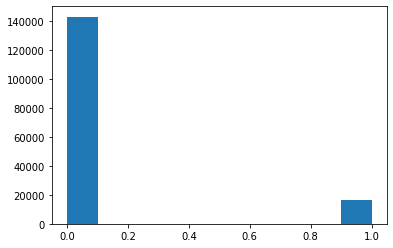

In [7]:
display(data_clean['toxic'].unique())
display(data_clean['toxic'].value_counts())
data_clean['toxic'].hist(grid=False);

Здесь виден сильный дисбаланс классов - соотношение 0 и 1 почти 9:1. Для обычных моделей придётся сбалансировать классы.

In [8]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords = set(nltk_stopwords.words('english')) # поскольку твиты английские, то и стоп-слова из английского
tqdm.pandas() # эту конструкцию я подсмотрела, она в дальнейшем позволит без проблем запускать полоску прогресса

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 1.1. BERT

Здесь выделяем параметры для BERT.

In [15]:
# константы
RANDOM_STATE = 12345 # это также найдёт применение и в обычной модели
BERT_SAMPLES = 5000
BATCH_SIZE = 500

data_bert = data_clean.copy()
data_bert = data_clean.sample(BERT_SAMPLES + 500, random_state=RANDOM_STATE).reset_index(drop=True) 
data_bert.head()

,text,toxic
0,Expert Categorizers \n\nWhy is there no menti...,0
1,"""\n\n Noise \n\nfart* talk. """,1
2,"An indefinite block is appropriate, even for a...",0
3,I don't understand why we have a screenshot of...,0
4,"Hello! Some of the people, places or things yo...",0


Теперь проверяем, доступно ли CUDA-устройство.

In [10]:
torch.cuda.is_available()

Устанавливаем видеокарту как устройство, на котором будет работать обучение. Если же устройство недоступно, то PyTorch будет работать на процессоре, как обычно.

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

Загружаем предобученную модель и токенизатор, которые и будут подготавливать эмбеддинги.

In [12]:
model_class, tokenizer_class, pretrained_weights = (transformers.BertModel, transformers.BertTokenizer, 
                                                    'bert-base-uncased')

# загрузка предобученной модели/токенизатора 
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)
model = model.to(device) # перемещаем работу на видеокарту

In [13]:
tokenized = data_bert['text'].progress_apply(lambda x: tokenizer.encode(x, add_special_tokens=True, 
                                                                        truncation=True, max_length=512))

In [15]:
tokens = []
target = []
for i in range(len(tokenized)):
    tokens.append(tokenized[i])
    target.append(data_bert['toxic'][i])
tokens = (pd.Series(tokens)).head(BERT_SAMPLES)
target = (pd.Series(target)).head(BERT_SAMPLES)

In [16]:
max_len = 0
for i in tqdm(tokens.values):
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tqdm(tokens.values)])
attention_mask = np.where(padded != 0, 1, 0)

In [17]:
display(padded.shape, attention_mask.shape)

Токенизация произведена, размеры правильные. Создаём эмбеддинги (само создание происходит на видеокарте, но при создании списка эмбеддингов батчи снова перемещаются в системную память под обработку процессором, т.к. NumPy не поддерживает CUDA).

In [18]:
batch_size = BATCH_SIZE
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.cuda.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.cuda.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().detach().numpy())
features_bert = np.concatenate(embeddings)

In [19]:
target_bert = target
target_bert.head()

### 1.2. TF-IDF

Поскольку классы требуют балансировки, нужно провести поиск лучшего способа и сравнить качество. Балансировать можно так:
1. Изменение весов в модели обучения
2. Ресемплирование с уменьшением класса 0

Ресемплирование с увеличением класса 1 не будем использовать из-за громоздкого набора данных.

In [9]:
# POS-тегирование
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [10]:
# подсмотрела лемматизатор, который работает быстрее, чем Mystem
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    text = text.lower()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])  
    text = re.sub(r"[^a-z']", ' ', lemmatized_output)
    return ' '.join(text.split()) 

In [11]:
%%time
data_clean['lemm_text'] = data_clean['text'].progress_apply(lemmatize_text)
data_clean.head()

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 1.62 s, sys: 60 ms, total: 1.68 s
Wall time: 1.68 s


,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,d'aww he match this background colour i 'm see...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i 'm really not try to edit war it 's ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca n't make any real suggestion on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


Разобьём выборку в соотношении 60:20:20.

In [16]:
target = data_clean['toxic']
features = data_clean.drop(['toxic', 'text'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.4, 
                                                                              random_state=RANDOM_STATE)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            test_size=0.5,
                                                                            random_state=RANDOM_STATE)

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

features_train = count_tf_idf.fit_transform(features_train['lemm_text'].values)
features_valid = count_tf_idf.transform(features_valid['lemm_text'].values)
features_test = count_tf_idf.transform(features_test['lemm_text'].values)
print('Размер обучающей выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер обучающей выборки: (95575, 138347)
Размер валидационной выборки: (31858, 138347)
Размер тестовой выборки: (31859, 138347)


Из-за размера выборки уменьшаем количество кросс-валидаций до 3, чтобы обрабатывалось не слишком долго. Проверяем значение F1-метрики на исходной выборке (без балансировки классов).

In [ ]:
%%time
cv_counts = 3
classificator = LogisticRegression()
train_f1 = cross_val_score(classificator, 
                      features_train, 
                      target_train, 
                      cv=cv_counts, 
                      scoring='f1').mean()
print('F1 на кросс-валидации:', train_f1)

### 1.3. Изменение баланса классов

#### 1.3.1. Изменение весов

In [ ]:
%%time

# встроенный метод для тестирования
classificator = LogisticRegression(class_weight='balanced')
train_f1_balanced = cross_val_score(classificator, 
                                    features_train, 
                                    target_train, 
                                    cv=cv_counts, 
                                    scoring='f1').mean()
print('F1 на кросс-валидации со сбалансированными классами:', train_f1_balanced)

In [ ]:
%%time

class_ratio = data_clean['toxic'].value_counts()[0] / data_clean['toxic'].value_counts()[1]
display(class_ratio)

dict_classes={0:1, 1:class_ratio}
classificator = LogisticRegression(class_weight=dict_classes)
train_f1_balanced_dict = cross_val_score(classificator, 
                                    features_train, 
                                    target_train, 
                                    cv=cv_counts, 
                                    scoring='f1').mean()
print('F1 на кросс-валидации со сбалансированными классами:', train_f1_balanced)

Оба метода дают идентичный результат. Но нужно проверить и ресемплирование.

#### 1.3.2. Ресемплирование с уменьшением класса 0

In [20]:
toxic_comments_train = data_clean.iloc[target_train.index]

target_train_class_zero = toxic_comments_train[toxic_comments_train['toxic'] == 0]['toxic']
target_train_class_one = toxic_comments_train[toxic_comments_train['toxic'] == 1]['toxic']

In [22]:
target_train_class_zero_downsample = target_train_class_zero.sample(target_train_class_one.shape[0],
                                                                    random_state=RANDOM_STATE)
target_train_downsample = pd.concat([target_train_class_zero_downsample, target_train_class_one])

features_train_downsample = data_clean.iloc[target_train_downsample.index]
features_train_downsample, target_train_downsample = shuffle(features_train_downsample,
                                                             target_train_downsample,
                                                             random_state=RANDOM_STATE)
features_train_downsample = count_tf_idf.transform(features_train_downsample['lemm_text'].values)
del count_tf_idf
del stopwords

In [34]:
%%time

classificator = LogisticRegression()
train_f1_downsampled = cross_val_score(classificator,
                      features_valid, 
                      target_valid, 
                      cv=cv_counts, 
                      scoring='f1').mean()
print('F1 на кросс-валидации с уменьшением класса 0:', train_f1_downsampled)

In [ ]:
target_train_downsample.hist(grid=False);

Однако, максимальный прирост F1-меры наблюдается при ресемплировании. Нужно проверить ROC-кривую.

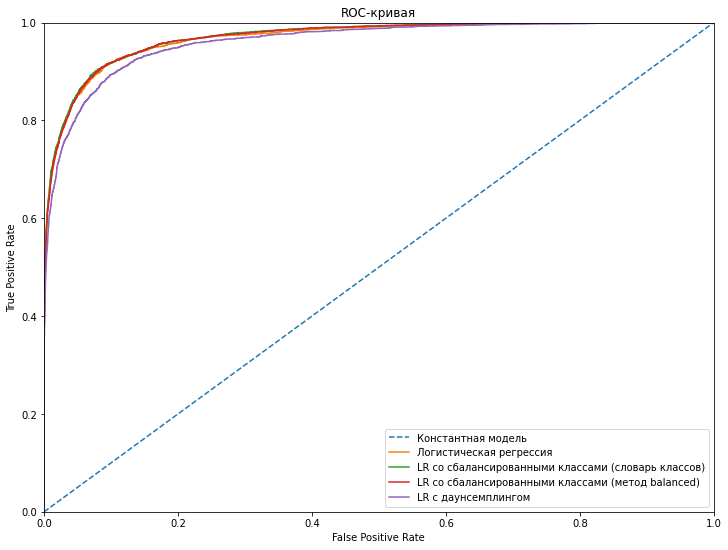

In [23]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Константная модель')


classificator = LogisticRegression()
classificator.fit(features_train, target_train)
probabilities_valid = classificator.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1 = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='Логистическая регрессия')

classificator = LogisticRegression(class_weight=dict_classes)
classificator.fit(features_train, target_train)
probabilities_valid = classificator.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_balanced = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_balanced = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR со сбалансированными классами (словарь классов)')

classificator = LogisticRegression(class_weight='balanced')
classificator.fit(features_train, target_train)
probabilities_valid = classificator.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_balanced = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_balanced = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR со сбалансированными классами (метод balanced)')

classificator = LogisticRegression()
classificator.fit(features_train_downsample,target_train_downsample)
probabilities_valid = classificator.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_downsampled = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_downsampled = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR с даунсемплингом')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right')

plt.title("ROC-кривая")
plt.show()

Здесь даунсемплинг не оправдал себя - он показывает результат (ROC-кривую) даже хуже, чем модель без какой-либо балансировки. Балансирование классов через словарь соотношения и встроенный метод balanced показало практически идентичные результаты; в дальнейшем будем использовать первый способ.

## 2. Обучение

### 2.1. Логистическая регрессия

In [ ]:
classificator = LogisticRegression()
hyperparams = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10, 100],
                'class_weight':[dict_classes]
                }]


print('Поиск гиперпараметров для f1_score...')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=cv_counts)
clf.fit(features_train, target_train)
print("Лучший набор параметров:")
print()
LR_best_params = clf.best_params_
print(LR_best_params)
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_LR = max(means)

In [ ]:
%%time

classificator = LogisticRegression()
classificator.set_params(**LR_best_params)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_LR = f1_score(target_valid, target_predict)
print('F1 на кросс-валидации:', cv_f1_LR)
print('F1 на валидационной выборке:', valid_f1_LR)

### 2.2. LGBM

In [ ]:
%%time

clf = lgb.LGBMClassifier(class_weight=dict_classes)
clf.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
cv_f1_lgb = cross_val_score(clf,
                                         features_train, 
                                         target_train, 
                                         cv=cv_counts, 
                                         scoring='f1').mean()
valid_f1_lgb = f1_score(target_valid, target_predict)
print('F1 на кросс-валидации:', cv_f1_lgb)
print('F1 на валидационной выборке:', valid_f1_lgb)

### 2.3. CatBoost

In [ ]:
%%time

classificator = CatBoostClassifier(verbose=False, iterations=200, class_weights=dict_classes)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
cv_f1_CBC = cross_val_score(classificator,
                                         features_train, 
                                         target_train, 
                                         cv=cv_counts, 
                                         scoring='f1').mean()
valid_f1_CBC = f1_score(target_valid, target_predict)
print('F1 на кросс-валидации:', cv_f1_CBC)
print('F1 на валидационной выборке:', valid_f1_CBC)

### 2.4. LogisticRegression with BERT

In [ ]:
# features_bert определена выше
target_bert = target_bert.head(len(features_bert))

features_train_bert, features_test_bert, target_train_bert, target_test_bert = train_test_split(
    features_bert, target_bert, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
%%time

classificator = LogisticRegression(class_weight='balanced') # c этим значение получается лучше, чем со словарём
classificator.fit(features_train_bert, target_train_bert)
target_predict = classificator.predict(features_test_bert)
valid_f1_bert = f1_score(target_test_bert, target_predict)
# print('F1 на кросс-валидации:', cv_f1_LR)
print('F1 на валидационной выборке:', valid_f1_bert)

## 3. Выводы

На валидационной выборке лучшие результаты показали логистическая регрессия (без BERT) и LightGBM. Поскольку значение F1-метрики на валидационной выборке у них идентично, на тестовых данных проверим обе и построим графики метрик.

In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Константная модель')

classificator = LogisticRegression()
classificator.set_params(**LR_best_params)
classificator.fit(features_train, target_train)
probabilities_test = classificator.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = classificator.predict(features_test)
plt.plot(fpr, tpr, label='Логистическая регрессия')

roc_lr = roc_auc_score(target_test, probabilities_one_test)
f1_lr = f1_score(target_test, predict_test)
precision_lr = precision_score(target_test, predict_test)
recall_lr = recall_score(target_test, predict_test)
acc_lr = accuracy_score(target_test, predict_test)

classificator = lgb.LGBMClassifier(class_weight=dict_classes)
classificator.fit(features_train, target_train)
probabilities_test = classificator.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = classificator.predict(features_test)
plt.plot(fpr, tpr, label='LightGBM')

roc_lgb = roc_auc_score(target_test, probabilities_one_test)
f1_lgb = f1_score(target_test, predict_test)
precision_lgb = precision_score(target_test, predict_test)
recall_lgb = recall_score(target_test, predict_test)
acc_lgb = accuracy_score(target_test, predict_test)

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right')

plt.title("ROC-кривая")
plt.show()

In [ ]:
results_lr = [roc_lr, f1_lr, precision_lr, recall_lr, acc_lr]
results_lgb = [roc_lgb, f1_lgb, precision_lgb, recall_lgb, acc_lgb]

cols = ['ROC AUC', 'F1', 'Precision', 'Recall', 'Accuracy']

result = pd.DataFrame(data=[results_lr, results_lgb], index=['LogisticRegression', 'LightGBM'], columns=cols)
result

Мы загрузили данные, представляющие собой ~160 тыс. комментариев интернет-магазина "Викишоп". Нам нужно было обучить модель, позволяющую находить токсичные комментарии.
Эта задача решалась двумя способами:
* классический TF-IDF
* с помощью эмбеддингов, полученных на предобученной модели BERT

Мы подготовили признаки для двух подходов, для подхода на основе эмбеддингов использовали 5000 сэмплов, т.к. с этим значением BERT справилась за разумное время, позволяющее без проблем перезапускать её для теста (для оптимизации скорости работы использовалась технология CUDA).

Из-за дисбаланса классов выборки использовалось изменение их весов, основанное на подсчитанном соотношении классов 0 и 1.

Для подхода TF-IDF лучшей моделью оказалась модель LogisticRegression, со значением F1-меры на валидационной выборке в 0.76, на тестовой - 0.75. Порог задачи в 0.75 преодолён.

Для подхода, основанном на эмбеддингах, значение F1-меры на валидационной выборке составило 0.66.

## 4. Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны